# <center>Optimizing Game Environments: A Comprehensive Study of AI Pathfinding Techniques</center>
### <center>By: Saadat Hamid Mansoor</center>

<div style="display: flex; justify-content: center;">
    <img src="img/FEE1.jpg" alt="Beautiful Sunset">
</div>

### Domain : Games
### Description:
In this coursework, we delve into the fascinating realm of AI pathfinding within the domain of video games. Navigating characters efficiently through dynamic and obstacle-laden game environments is a crucial aspect of creating immersive gaming experiences. We explore three distinct AI pathfinding techniques, analyzing their strengths, weaknesses, and applicability in gaming scenarios. Our selected techniques include traditional A* algorithms, machine learning-based approaches, and heuristic-based optimizations. By comparing and evaluating these techniques, we aim to uncover the most effective strategies for game developers to enhance player experiences. The study also addresses the specific input data requirements and expected output outcomes associated with each technique. Join us on this exploration of AI-driven pathfinding, where strategic decisions and innovative solutions shape the virtual landscapes of tomorrow's gaming worlds. (thanks GPT)


# some Image code under here: 

![Image Alt Text](img/Crate.jpg)


<video width="640" height="480" controls>
  <source src="video.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

# Part A – Application area review.

## Introduction
Artificial Intelligence (AI) has been an integral part of video games since their inception in the 1950s. In video games, AI is used to generate responsive, adaptive, or intelligent behaviors primarily in non-playable characters (NPCs), similar to human-like intelligence. AI in video games is a distinct subfield and differs from academic AI. It serves to improve the game-player experience rather than machine learning or decision making. The integration of Artificial Intelligence (AI) in the gaming industry has transformed virtual environments, enhancing player experiences through lifelike behaviors and dynamic content generation. 


## Overview of AI in Games
AI, once confined to the realms of enemy character behaviors, has now become an omnipresent force in modern game development. Its influence permeates every aspect of the gaming experience, introducing layers of complexity that enhance the immersive nature of virtual environments.

1. Pathfinding Algorithms: At the heart of dynamic character movement lies the elegance of pathfinding algorithms. A* (A-star), Dijkstra's algorithm, and Depth-First Search (DFS) are the digital cartographers guiding characters through the virtual realms. These algorithms are not mere mathematical constructs; they are the architects of seamless exploration, ensuring that characters traverse diverse landscapes with a natural fluidity.

2. Terrain Generation: The canvas on which the gaming narrative unfolds is no longer static but a living, breathing entity shaped by terrain generation algorithms. Perlin noise and cellular automata, akin to virtual sculptors, craft terrains with jagged mountain ranges, meandering rivers, and sprawling valleys. The result is a dynamic backdrop that responds to the player's every action, creating an ever-changing tapestry of visual splendor and strategic challenges.

3. Procedural Content Creation: The storytellers of virtual worlds are no longer bound by predefined narratives. Procedural content creation liberates game designers, enabling them to dynamically construct levels, quests, and items. This algorithmic storytelling, exemplified in games like "Spelunky," transforms each playthrough into a unique odyssey, where surprises and challenges unfold organically.

As we traverse the landscape of AI in games, we uncover not just a technological revolution but a reimagining of the very essence of interactive entertainment. The overview presented here is a glimpse into the intricate dance between AI algorithms and creative expression that defines the modern gaming experience. It is a testament to the limitless possibilities that emerge when the binary code meets the boundless realm of human imagination.




# Part B – Compare and evaluate AI techniques

### GPT Advice :

Certainly! For your coursework on optimizing game environments using AI pathfinding techniques (specifically A*), here are two other AI techniques that you can consider comparing:

## Dijkstra's Algorithm:

Description: Dijkstra's algorithm is a classic graph search algorithm used for finding the shortest path between nodes in a graph. It explores the graph based on the weights assigned to edges, and it guarantees finding the shortest path.


Strengths:
Finds the exact shortest path between two points.
Works well in scenarios where the cost of traversal is the primary concern.


Weaknesses:
Can be computationally expensive for large graphs.
Does not consider heuristics, which may result in suboptimal paths in certain scenarios.

-----------------------------------------------------------------------------------------------------------------------

## Depth-First Search (DFS) with Backtracking:
Description: DFS is an algorithm that explores a graph by going as deep as possible along each branch before backtracking. When combined with backtracking, it can be used to explore and traverse game environments efficiently.


Strengths:
Memory efficient as it does not require storing the entire search tree.
Can handle large graphs and complex environments.


Weaknesses:
Does not guarantee finding the shortest path.
Paths may be suboptimal in terms of traversal cost.

-----------------------------------------------------------------------------------------------------------------------
When comparing these techniques, you can consider aspects such as computational efficiency, memory usage, optimality of paths, and adaptability to different types of game environments. Discuss how each technique addresses the challenges of pathfinding in the context of game environments and justify why you chose A*, Dijkstra's algorithm, and DFS with backtracking for your comparison. Additionally, provide examples of how each technique can be implemented in the context of optimizing game environments.


# Part C – Implementation

This cell includes the import statements for the required libraries: matplotlib for plotting, numpy for numerical operations, and heapq for the priority queue used in the A* algorithm. random is imported for generating random obstacle positions.

In [29]:
#!pip install matplotlib
#!pip install numpy
#!pip install noise


^C


In [30]:
# Import necessary libraries
# for section 1
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush
import random
import time  # Import the time module
# for section 2
import noise
from matplotlib.colors import ListedColormap


## Section 1 Weighted and Non Weighted Pathfinding With A star Algoritm to Navigate a Maze

This cell defines the A* pathfinding algorithm with helper functions: neighbors, heuristic, and reconstruct_path. The A* algorithm is used to find the optimal path from the start point to the goal on a grid with obstacles.

In [3]:
# Define the A* pathfinding algorithm with least steps priority
def astar_least_steps(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    all_paths = []  # Track all paths explored
    path = []  # Initialize the path variable
    iterations = 0  # Counter for iterations taken

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        for neighbor in neighbors(current_node, rows, cols, grid):
            new_cost = cost_so_far[current_node] + 1  # Each step has a cost of 1

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = len(path)  # Prioritize fewer steps
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                path = reconstruct_path(came_from, start, neighbor)  # Update the path

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

    if all_paths:
        # Find the shortest path among all explored paths
        shortest_path = min(all_paths, key=len)
        print("------------------------------ Shortest Path ----------------------------------")
        print(f"Number of iterations: {iterations}")
        print(f"Number of steps: {len(shortest_path) - 1}")  # Subtract 1 to get the number of steps
        print("-------------------------------------------------------------------------------")
        return shortest_path, all_paths
    else:
        print("No path found.")
        return [], all_paths



In [4]:
# Define the A* pathfinding algorithm with weights
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [grid[start[0], start[1]]]}  # Track weights along the path
    all_paths = []  # Track all paths explored
    iterations = 0  # Counter for iterations taken

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print weights along the path before returning
            total_cost = sum(random_numbers[node[0], node[1]] for node in path)  # Calculate total cost
            weights_str = " + ".join(map(str, weights_along_path[goal]))
            
            print("-------------------------- Shortest Path Weighted -----------------------------")
            print(f"Number of iterations: {iterations}")
            # Count the steps from start to goal
            num_steps = len(path) - 1
            print(f"Number of steps: {num_steps}")
            # print(f'Total cost = {weights_str}  \n           = {total_cost}')  #uncomment for full math output
            print(f'Total cost = {total_cost}')
            print("-------------------------------------------------------------------------------")
            
            return path, total_cost, weights_along_path, all_paths

        for neighbor in neighbors(current_node, rows, cols, grid):
            weight = random_numbers[neighbor[0], neighbor[1]]  # Use weights from random_numbers
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(goal, neighbor)
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                # Update weights along the path
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]
                iterations += 1  # Increment the iteration counter for each movement

    # If the goal is not reached, return an empty path
    print("No path found.")
    return [], float('inf'), {}, all_paths




This cell defines the neighbors function, which returns the valid neighboring nodes for a given node on the grid. It considers the boundaries and obstacles in the grid.

In [5]:
# Define helper function to get neighboring nodes
def neighbors(node, rows, cols, grid):
    row, col = node
    neighbors = []
    if row > 0 and grid[row - 1, col] == 0:
        neighbors.append((row - 1, col))
    if row < rows - 1 and grid[row + 1, col] == 0:
        neighbors.append((row + 1, col))
    if col > 0 and grid[row, col - 1] == 0:
        neighbors.append((row, col - 1))
    if col < cols - 1 and grid[row, col + 1] == 0:
        neighbors.append((row, col + 1))
    return neighbors


This cell defines the heuristic function used in the A* algorithm. The heuristic estimates the cost from a given node to the goal.

In [6]:
# Define heuristic function for A*
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


This cell defines the reconstruct_path function, which reconstructs the optimal path from the came_from dictionary generated during the A* search.

In [7]:
# Define function to reconstruct the path from start to goal
def reconstruct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


This cell initializes the game environment by creating a grid with a specified size and adding random obstacles to the grid based on the given density.

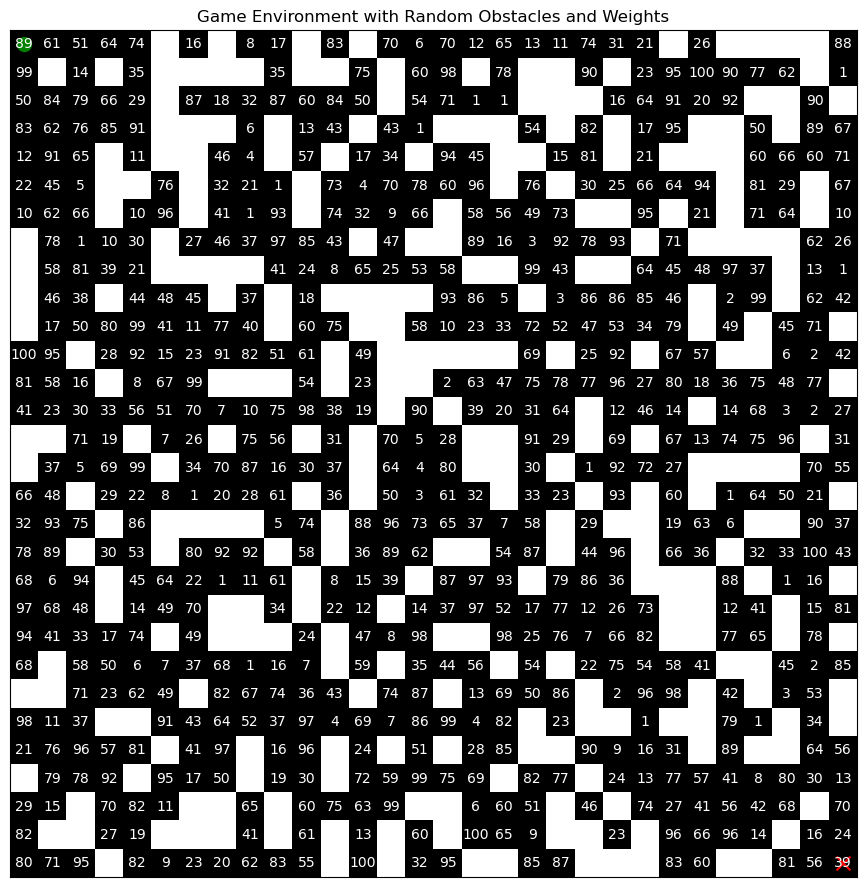

In [13]:
# Define the game environment with random obstacles
grid_size = (30, 30)  # Increase the grid size
obstacle_density = 0.3  # Adjust the obstacle density as needed
grid = np.zeros(grid_size)
random_numbers = np.zeros(grid_size)  # Store random numbers for each cell

# Add random obstacles and numbers to the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if random.random() < obstacle_density:
            grid[i, j] = 1
        else:
            random_numbers[i, j] = random.randint(1, 100)

# Visualize the grid with obstacles and numbers
plt.figure(figsize=(11, 11))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points (optional)
start_point = (0, 0)
goal_point = (grid_size[0] - 1, grid_size[1] - 1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*goal_point, color='red', marker='x', s=100, label='Goal')

# Add random numbers as text on each walkable box
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.title('Game Environment with Random Obstacles and Weights')
plt.show()


This cell calls the A* algorithm to find the optimal path from the start to the goal in the defined grid.

In [14]:
# Find both the weighted and non-weighted optimal paths using A*
shortest_path_least_steps, _ = astar_least_steps(start_point, goal_point, grid)
weighted_optimal_path, _, _, _ = astar(start_point, goal_point, grid)

------------------------------ Shortest Path ----------------------------------
Number of iterations: 610
Number of steps: 64
-------------------------------------------------------------------------------
-------------------------- Shortest Path Weighted -----------------------------
Number of iterations: 1189
Number of steps: 68
Total cost = 2617.0
-------------------------------------------------------------------------------


This cell visualizes the grid, the start and goal points, and the optimal path using Matplotlib. The figure size is adjusted for better visibility. Green represents the start point, red represents the goal point, and blue represents the optimal path on the grid with obstacles.

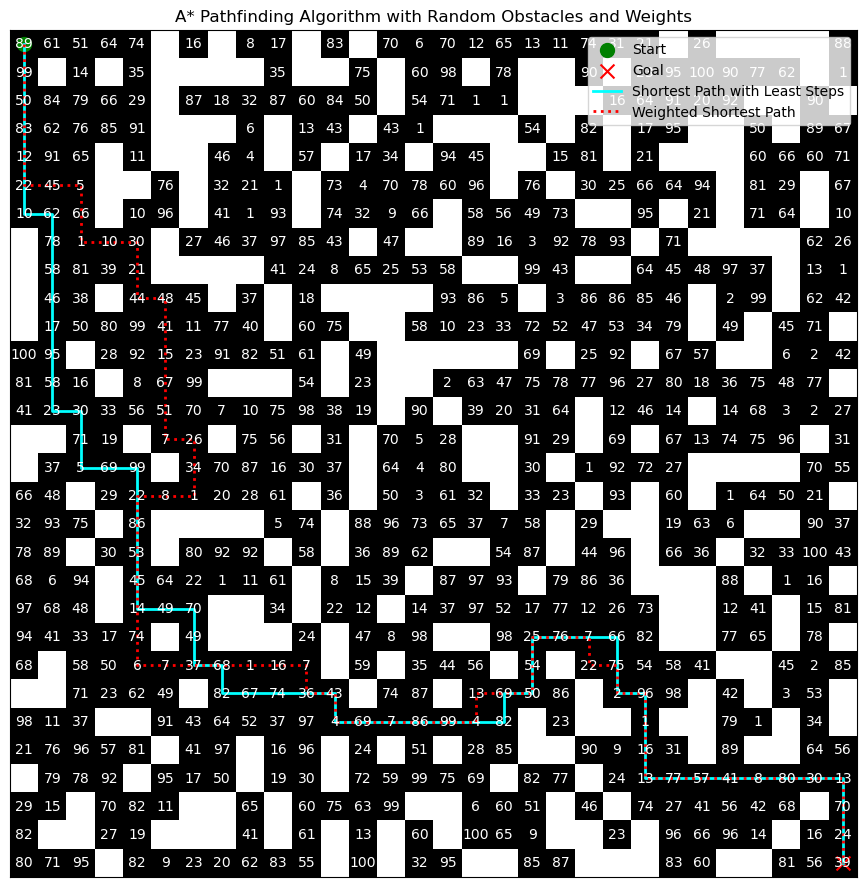

In [15]:
# Cell 8
# Visualize the grid and the optimal paths with adjusted figure size
plt.figure(figsize=(11, 11))  # Adjust the figure size
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=1)

# Mark the start and goal points
plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*goal_point, color='red', marker='x', s=100, label='Goal')

# Plot the shortest path with least steps in yellow
shortest_path_least_steps_x, shortest_path_least_steps_y = zip(*shortest_path_least_steps)
plt.plot(shortest_path_least_steps_y, shortest_path_least_steps_x, color='aqua', linewidth=2, label='Shortest Path with Least Steps')

# Plot the weighted optimal path in blue
optimal_path_x, optimal_path_y = zip(*weighted_optimal_path)
plt.plot(optimal_path_y, optimal_path_x, color='red', linestyle='dotted', linewidth=2, label='Weighted Shortest Path')

# Add random numbers as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:
            plt.text(j, i, str(int(random_numbers[i, j])), ha='center', va='center', color='white')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


plt.legend()
plt.title('A* Pathfinding Algorithm with Random Obstacles and Weights')
plt.show()




## Section 2

In [31]:
# Define the A* pathfinding algorithm for Perlin noise-based terrain
def astar_terrain(start, goal, terrain):
    rows, cols = terrain.shape
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [terrain[start[0], start[1]]]}  # Track weights along the path
    all_paths = []  # Track all paths explored
    iterations = 0  # Counter for iterations taken
    
    # Record the start time
    start_time = time.time()
    
    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print weights along the path before returning
            total_cost = sum(terrain[node[0], node[1]] for node in path)  # Calculate total cost
            weights_str = " + ".join(map(str, weights_along_path[goal]))
            
            grass_count = weights_along_path[goal].count(1)
            sand_count = weights_along_path[goal].count(2)
            water_count = weights_along_path[goal].count(3)

            # Record the end time
            end_time = time.time()

            # Calculate the total time taken
            total_time = end_time - start_time
            formatted_time = format_time(total_time)
            print("--------------------- Shortest Path on Terrain ----------------------")
            print(f"Number of iterations: {iterations}")
            print(f"Time taken: {formatted_time} seconds")
            num_steps = len(path) - 1
            print(f"Number of steps: {num_steps}           [This does not Include the Start Tile!]")
            print(f"Number of grass tiles: {grass_count}")
            print(f"Number of sand tiles: {sand_count}")
            print(f"Number of water tiles: {water_count}")
            print(f'Total cost = {total_cost}')
            print("-----------------------------------------------------------------------")

            return path, total_cost, weights_along_path, all_paths

        for neighbor in terraneighbors(current_node, rows, cols, terrain):  # Change this line
            weight = terrain[neighbor[0], neighbor[1]]  # Use weights from terrain
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(current_node, goal)  # Update priority calculation
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                # Update weights along the path
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]

    # If the goal is not reached, return an empty path
    print("No path found.")
    return [], float('inf'), {}, all_paths

In [17]:
# Define helper function to get neighboring nodes
def terraneighbors(node, rows, cols, terrain):
    row, col = node
    neighbors = []
    if row > 0 and terrain[row - 1, col] in [1, 2, 3]:
        neighbors.append((row - 1, col))
    if row < rows - 1 and terrain[row + 1, col] in [1, 2, 3]:
        neighbors.append((row + 1, col))
    if col > 0 and terrain[row, col - 1] in [1, 2, 3]:
        neighbors.append((row, col - 1))
    if col < cols - 1 and terrain[row, col + 1] in [1, 2, 3]:
        neighbors.append((row, col + 1))
    return neighbors


In [18]:
def format_time(duration):
    milliseconds = int(duration * 1000)
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)

    return f"{hours:02d}:{minutes:02d}:{seconds:02d}.{milliseconds:03d}"

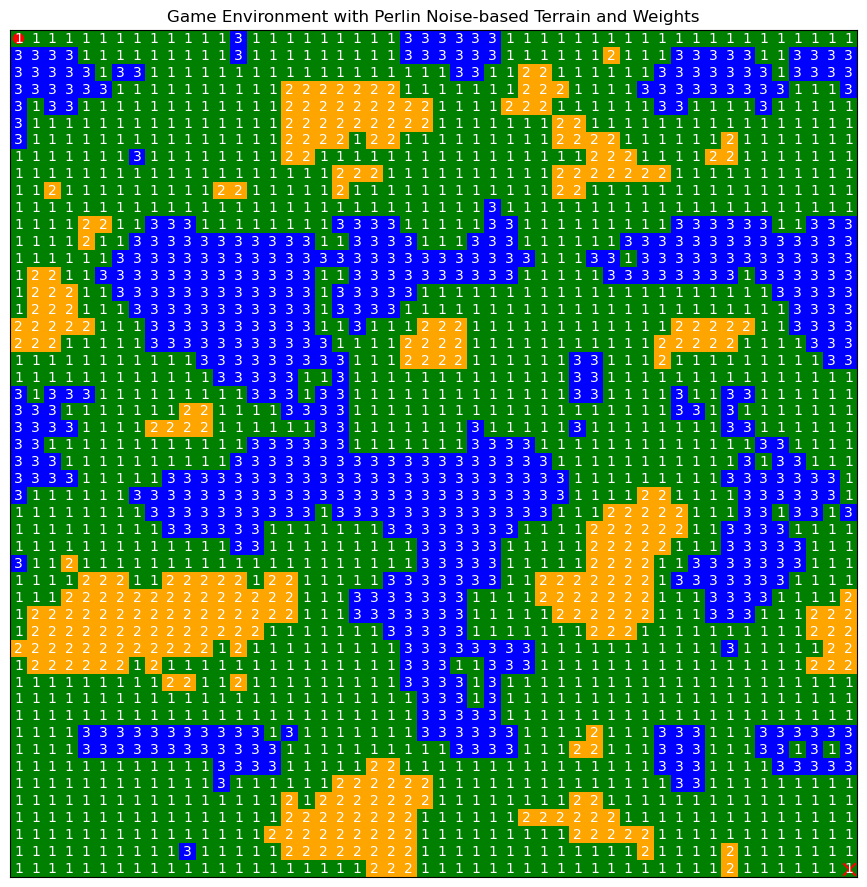

In [39]:
# Function to generate 2D Perlin noise
def generate_perlin_noise(shape, scale=100.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=None):
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=octaves,
                                        persistence=persistence,
                                        lacunarity=lacunarity,
                                        repeatx=1024,
                                        repeaty=1024,
                                        base=seed)
    return world

# Define the terrain with three colors: blue (water), green (grass), yellow (sand)
grid_size = (50, 50)  # Adjust the grid size as needed
terrain_density = [0.4, 0.3, 0.3]  # Adjust the density for each color

# Generate 2D Perlin noise for the terrain with the random seed
terrain_noise = generate_perlin_noise(grid_size, scale=10.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=random.randint(0, 1000))

# Normalize the noise values to be between 0 and 1
terrain_noise = (terrain_noise - np.min(terrain_noise)) / (np.max(terrain_noise) - np.min(terrain_noise))

# Categorize the terrain based on noise values and density
terrain = np.zeros(grid_size, dtype=int)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if terrain_noise[i, j] < terrain_density[0]:
            terrain[i, j] = 3  # Water
        elif terrain_noise[i, j] < terrain_density[0] + terrain_density[1]:
            terrain[i, j] = 1  # Grass
        else:
            terrain[i, j] = 2  # Sand

# Visualize the terrain with custom colormap
plt.figure(figsize=(11, 11))  # Adjust the figure size

# Define custom colormap for water, grass, and sand
colors_terrain = ['green', 'orange', 'blue']
custom_cmap_terrain = ListedColormap(colors_terrain)

# Create a custom normalization for the colormap
norm = plt.Normalize(1, 3)

# Create a color array for the terrain using the colormap and normalization
terrain_color = custom_cmap_terrain(norm(terrain))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Mark the start and goal points (optional)
start_point_terrain = (0, 0)
goal_point_terrain = (grid_size[0] - 1, grid_size[1] - 1)

# Mark the start and goal points
plt.scatter(*start_point_terrain, color='red', marker='o', s=50, label='Start')
plt.scatter(*goal_point_terrain, color='red', marker='x', s=80, label='Goal')

# Add weights as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        weight = 3 if terrain[i, j] == 3 else 1 if terrain[i, j] == 1 else 2  # Water has weight 3, Grass has weight 1, Sand has weight 2
        plt.text(j, i, str(weight), ha='center', va='center', color='white')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.title('Game Environment with Perlin Noise-based Terrain and Weights')
plt.show()


--------------------- Shortest Path on Terrain ----------------------
Number of iterations: 1124
Time taken: 00:00:00.009 seconds
Number of steps: 98           [This does not Include the Start Tile!]
Number of grass tiles: 96
Number of sand tiles: 3
Number of water tiles: 0
Total cost = 102
-----------------------------------------------------------------------


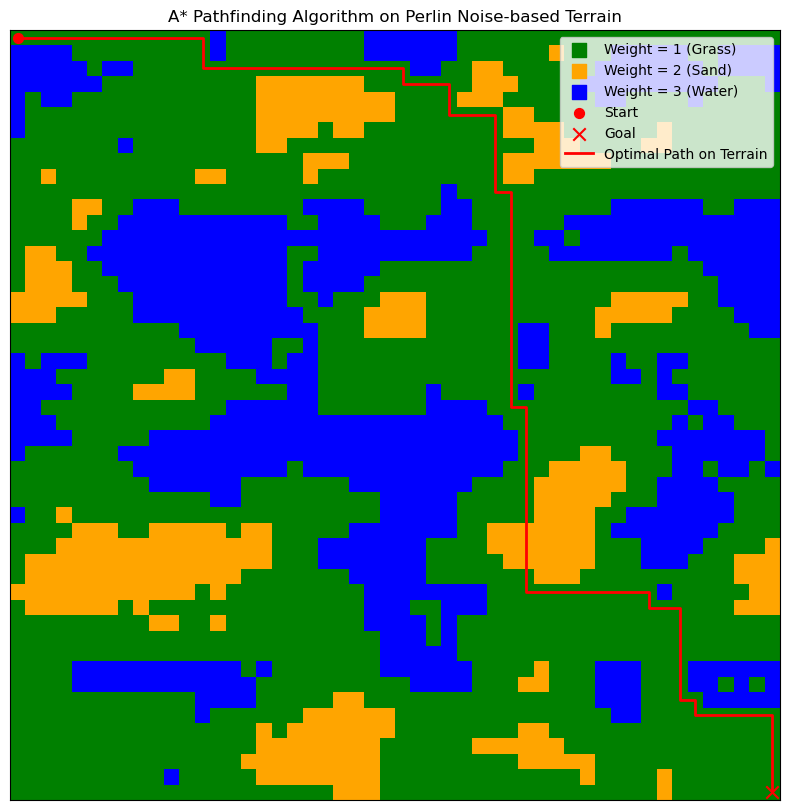

In [40]:
# Find the optimal path on Perlin noise-based terrain using A*
terrain_optimal_path, _, _, _ = astar_terrain(start_point_terrain, goal_point_terrain, terrain)
#======================================================================================================================== WHY NOT
# Visualize the terrain and the optimal path with adjusted figure size
plt.figure(figsize=(10, 10))  # Adjust the figure size

# Define custom colormap for water, grass, and sand
colors_terrain = ['green', 'orange', 'blue']
custom_cmap_terrain = ListedColormap(colors_terrain)

# Create a custom normalization for the colormap
norm = plt.Normalize(1, 3)

# Create a color array for the terrain using the colormap and normalization
terrain_color = custom_cmap_terrain(norm(terrain))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Define labels for the legend without actually marking the points
plt.scatter([], [], color='green', marker='s', s=100, label='Weight = 1 (Grass)')
plt.scatter([], [], color='orange', marker='s', s=100, label='Weight = 2 (Sand)')
plt.scatter([], [], color='blue', marker='s', s=100, label='Weight = 3 (Water)')

# Mark the start and goal points
plt.scatter(*start_point_terrain, color='red', marker='o', s=50, label='Start')
plt.scatter(*goal_point_terrain, color='red', marker='x', s=80, label='Goal')

# Plot the optimal path on Perlin noise-based terrain in yellow
optimal_path_terrain_x, optimal_path_terrain_y = zip(*terrain_optimal_path)
plt.plot(optimal_path_terrain_y, optimal_path_terrain_x, color='Red', linewidth=2, label='Optimal Path on Terrain')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.legend(loc='upper right')



plt.title('A* Pathfinding Algorithm on Perlin Noise-based Terrain')
plt.show()


# Part D – Testing.

| No. | Test case  | Expected result |Actual result|Pass / Fail|
|----------|----------|----------|----------|----------|
| 1| Custom noise | Generates noise using a custom function other than Mathf.PerlinNoise. | Generates noise from a custom Perlin noise function on the GPU | <span style="color: Green;">Pass</span> |
| 2 | Row 2, Col 2 | Row 2, Col 3 | Row 1, Col 3 | Row 1, Col 3 |
| 2 | Row 3, Col 2 | Row 3, Col 3 | Row 1, Col 3 | Row 1, Col 3 |

# Part E – Evaluate results.

# something try see


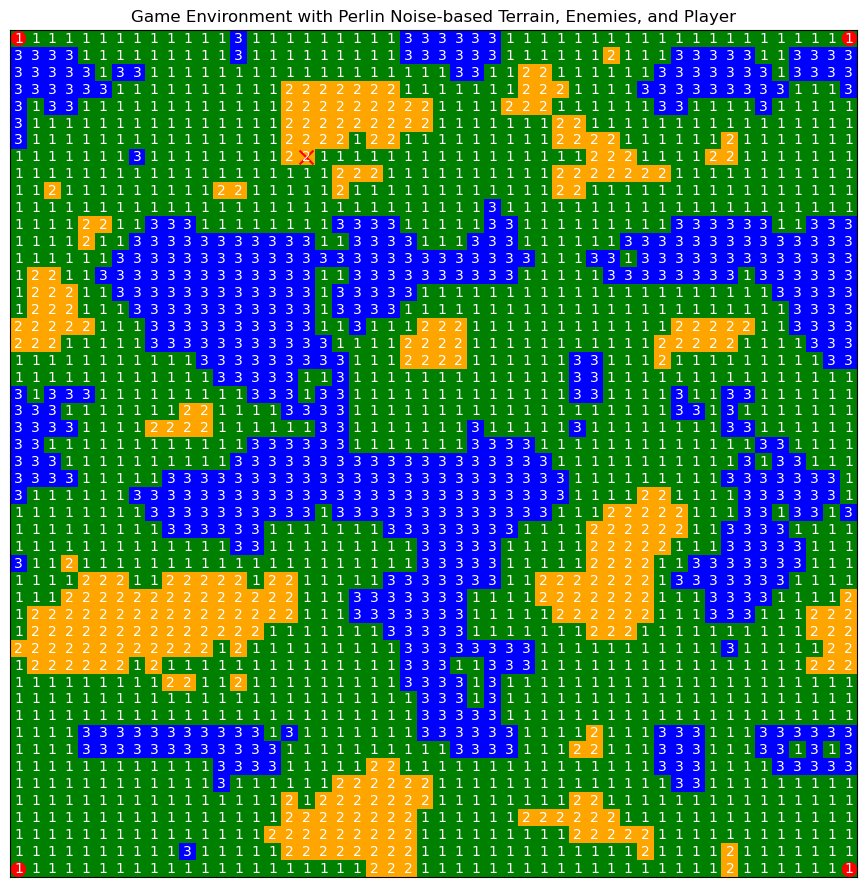

--------------------- Shortest Path on Terrain ----------------------
Number of iterations: 114
Time taken: 00:00:00.000 seconds
Number of steps: 24           [This does not Include the Start Tile!]
Number of grass tiles: 22
Number of sand tiles: 1
Number of water tiles: 2
Total cost = 30
-----------------------------------------------------------------------
--------------------- Shortest Path on Terrain ----------------------
Number of iterations: 837
Time taken: 00:00:00.000 seconds
Number of steps: 63           [This does not Include the Start Tile!]
Number of grass tiles: 63
Number of sand tiles: 0
Number of water tiles: 1
Total cost = 66
-----------------------------------------------------------------------
--------------------- Shortest Path on Terrain ----------------------
Number of iterations: 183
Time taken: 00:00:00.007 seconds
Number of steps: 39           [This does not Include the Start Tile!]
Number of grass tiles: 39
Number of sand tiles: 1
Number of water tiles: 0
To

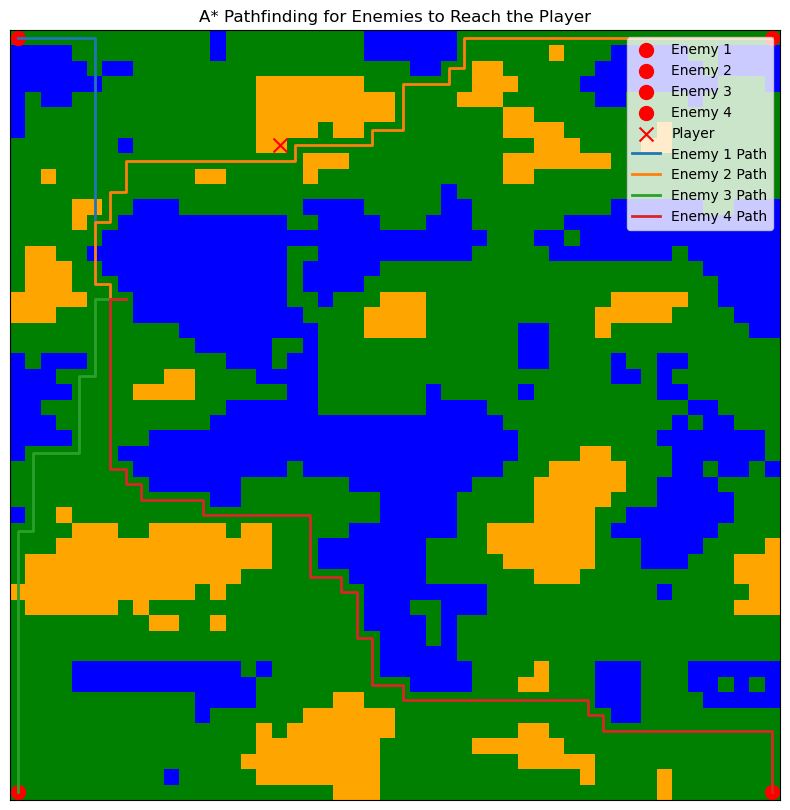

In [41]:
# Cell 3: Set start spots as enemy 1, 2, 3, and 4
start_points_enemies = [(0, 0), (0, grid_size[1] - 1), (grid_size[0] - 1, 0), (grid_size[0] - 1, grid_size[1] - 1)]

# Visualize the terrain with custom colormap and start points for enemies
plt.figure(figsize=(11, 11))

# Create a color array for the terrain using the colormap and normalization
terrain_color = custom_cmap_terrain(norm(terrain))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Mark the start points for enemies
for i, start_point_enemy in enumerate(start_points_enemies, start=1):
    plt.scatter(*start_point_enemy, color='red', marker='o', s=100, label=f'Enemy {i}')

# Mark the goal point for the player (randomly placed)
goal_point_player = (np.random.randint(grid_size[0]), np.random.randint(grid_size[1]))
plt.scatter(*goal_point_player, color='red', marker='x', s=100, label='Player')

# Add weights as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        weight = 3 if terrain[i, j] == 3 else 1 if terrain[i, j] == 1 else 2
        plt.text(j, i, str(weight), ha='center', va='center', color='white')

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.title('Game Environment with Perlin Noise-based Terrain, Enemies, and Player')
plt.show()

# Cell 4: Find the optimal paths for all enemies to reach the player
optimal_paths_enemies = []

for start_point_enemy in start_points_enemies:
    enemy_path, _, _, _ = astar_terrain(start_point_enemy, goal_point_player, terrain)
    optimal_paths_enemies.append(enemy_path)

# Visualize the terrain, start points for enemies, and the optimal paths
plt.figure(figsize=(10, 10))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Mark the start points for enemies
for i, start_point_enemy in enumerate(start_points_enemies, start=1):
    plt.scatter(*start_point_enemy, color='red', marker='o', s=100, label=f'Enemy {i}')

# Mark the goal point for the player
plt.scatter(*goal_point_player, color='red', marker='x', s=100, label='Player')

# Plot the optimal paths for enemies to reach the player
for i, optimal_path_enemy in enumerate(optimal_paths_enemies, start=1):
    optimal_path_enemy_x, optimal_path_enemy_y = zip(*optimal_path_enemy)
    plt.plot(optimal_path_enemy_y, optimal_path_enemy_x, linewidth=2, label=f'Enemy {i} Path')

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.legend(loc='upper right')
plt.title('A* Pathfinding for Enemies to Reach the Player')
plt.show()
